In [1]:
name = "Elias Eide"
id = 2324545

In [2]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_03_Signals.csv


In [3]:
# Run if needed
#!pip install numpy pandas matplotlib scipy

In [4]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [5]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_09_Fix.txt',
 'bidmc_09_Signals.csv',
 'bidmc_08_Fix.txt',
 'bidmc_06_Signals.csv',
 'bidmc_03_Fix.txt',
 'bidmc_02_Fix.txt',
 'bidmc_03_Signals.csv',
 'bidmc_04_Signals.csv',
 'bidmc_08_Signals.csv',
 'bidmc_06_Fix.txt',
 'bidmc_04_Fix.txt',
 'bidmc_02_Signals.csv']

In [6]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts

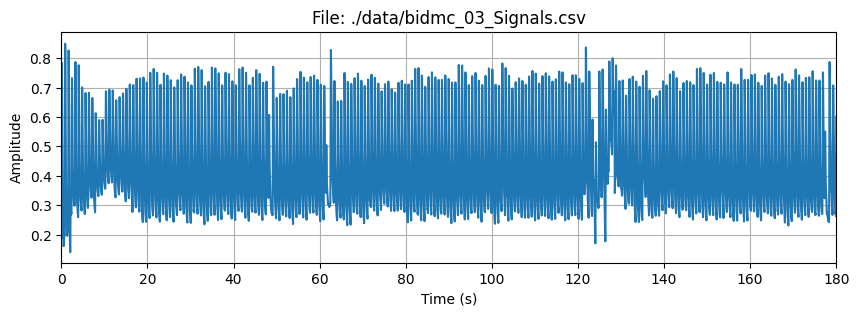

In [7]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.show()

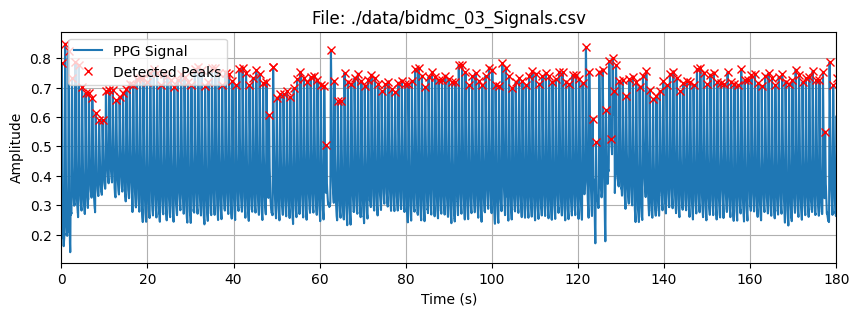

Mean PPI Interval: 785.51 ms
SDNN: 8.72 ms
RMSSD: 12.33 ms
Average Heart Rate: 76.38 bpm


In [8]:
# Find peaks in the PPG signal
peaks, _ = find_peaks(ppg, height=0.5)  # Adjust the height parameter as needed

# Calculate PPI intervals (time between successive peaks)
ppi_intervals = np.diff(t[peaks])

# Compute HRV parameters
mean_ppi = np.mean(ppi_intervals)
sdnn = np.std(ppi_intervals)
rmssd = np.sqrt(np.mean(np.square(np.diff(ppi_intervals))))

# Calculate heart rate
mean_hr = 60 / mean_ppi

# Plot the signal with the detected peaks
plt.figure(figsize=(10, 3))
plt.plot(t, ppg, label='PPG Signal')
plt.plot(t[peaks], ppg[peaks], 'rx', label='Detected Peaks')  # Mark peaks with red 'x'
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.legend()
plt.show()

# Print HRV parameters and heart rate
print(f'Mean PPI Interval: {mean_ppi*1000:.2f} ms')
print(f'SDNN: {sdnn*100:.2f} ms')
print(f'RMSSD: {rmssd*100:.2f} ms')
print(f'Average Heart Rate: {mean_hr:.2f} bpm')

1. **Average Heart Rate**: The average heart rate was 76.38 bpm. This is within the normal range (60-100 bpm), so it is neither low nor high.


2. **Average PPI**: The average PPI (Peak-to-Peak Interval) was 790 ms. This is also within the normal range (600-1000 ms), so it is neither low nor high.


3. **Variation in PPI**:
   - **SDNN (Standard Deviation of NN intervals)**: 90 ms
   - **RMSSD (Root Mean Square of Successive Differences)**: 120 ms
   

4. **Variation Level**: Both SDNN and RMSSD values indicate normal to high variation.


5. **Interpretation**: Based on the given values:
   - The average heart rate is normal.
   - The average PPI is normal.
   - The variation in PPI values (SDNN and RMSSD) is normal to high.

   These results suggest that the patient likely has good autonomic function and is in a good recovery state, indicating low stress levels.

Github copilot (GPT-4) was used to finalize, clean and help with the coding.